# OpenCV course

learning material, cheat sheet, whatever

In [253]:
import cv2 as cv

import matplotlib.pyplot as plt
import numpy as np

In [254]:
test_img = "E:\\IOAI\\kits\\onia-2025\\eval_img\\65.png"

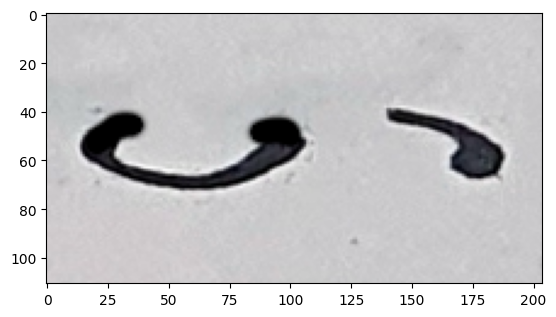

In [255]:
img = cv.imread(test_img)
plt.imshow(img)

# Core functions

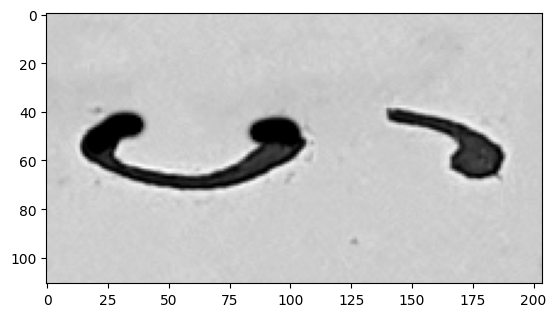

In [256]:
grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(grayscale, cmap='gray') # not very visible, ikr

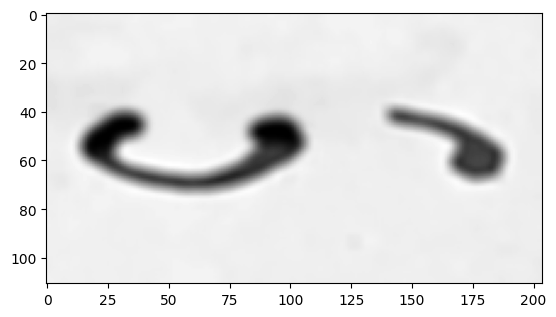

In [257]:
blur = cv.GaussianBlur(grayscale, (7, 7), cv.BORDER_DEFAULT)
plt.imshow(blur, cmap="gray")

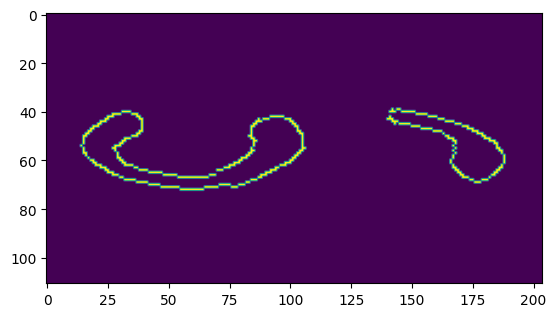

In [258]:
canny = cv.Canny(blur, 175, 255)
plt.imshow(canny)

# Contour detection

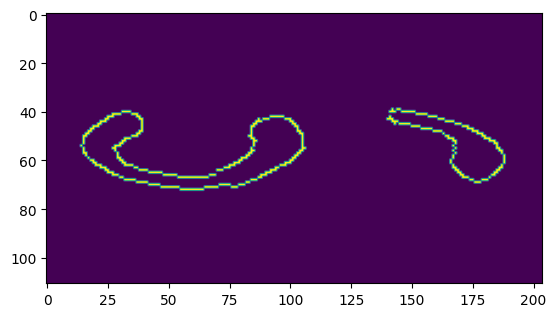

In [259]:
# approach 1 - canny edge detector

grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(grayscale, (7, 7), cv.BORDER_DEFAULT)
canny = cv.Canny(blur, 175, 255)
plt.imshow(canny)

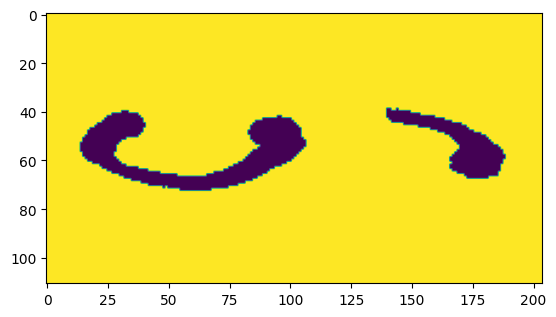

In [260]:
# approach 2 - thresholding

ret, thresh = cv.threshold(grayscale, 125, 255, cv.THRESH_BINARY)
plt.imshow(thresh)

In [261]:
contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

len(contours)

2

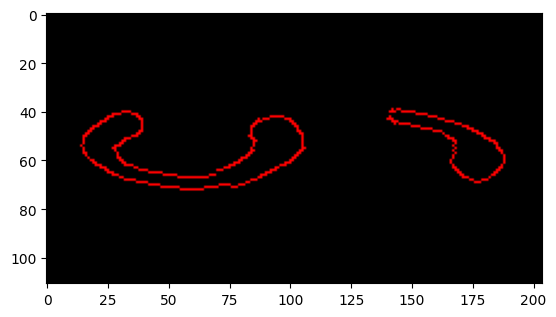

In [262]:
blank = np.zeros_like(img, dtype=np.uint8)
cv.drawContours(blank, contours, -1, 255, 1)

plt.imshow(blank)

# Binarizing

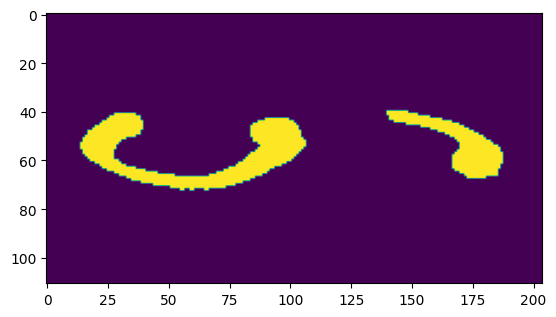

In [270]:
# anything below 100, we set to 255
_, thres = cv.threshold(grayscale, 100, 255, cv.THRESH_BINARY_INV)
plt.imshow(thres)

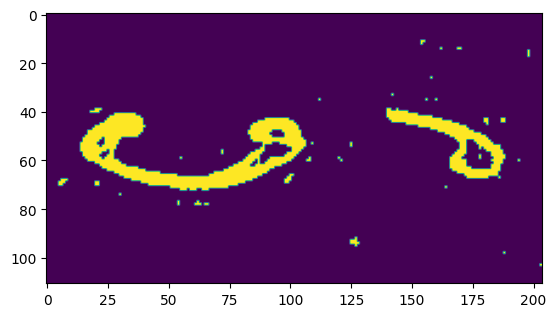

In [283]:
# let the algo decide the optimal thresholding value
adaptive_thres = cv.adaptiveThreshold(grayscale, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 11, 10)
plt.imshow(adaptive_thres)

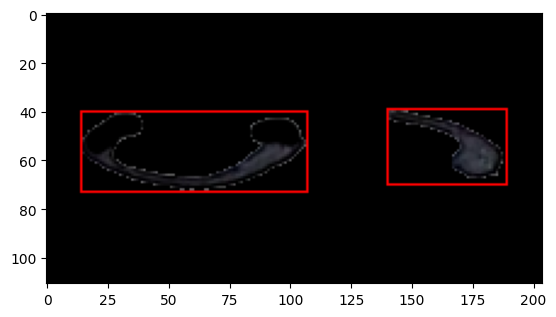

In [294]:
# masking
masked = cv.bitwise_and(img, img, mask=thres)

# draw bounding boxes
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(masked, (x, y), (x + w, y + h), 255, 1)

plt.imshow(masked)

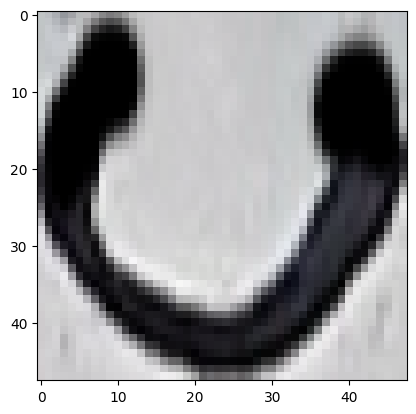

In [299]:
# cropping
x, y, w, h = cv.boundingRect(contours[0])
neuma = img[y : y + h, x : x + w]
neuma = cv.resize(neuma, (48, 48))
plt.imshow(neuma)

# Debug visualizations

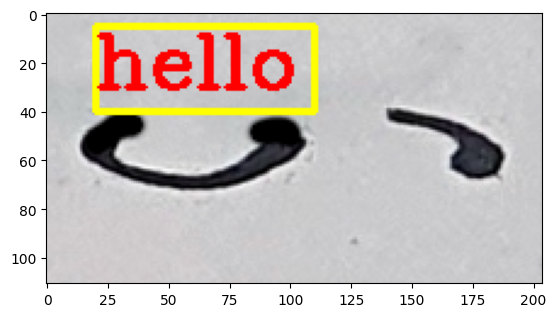

In [264]:
dbg_img = img.copy()

cv.rectangle(dbg_img, (20, 5), (110, 40), (255, 255, 0), thickness=2)
cv.putText(dbg_img, "hello", (20, 30), cv.FONT_HERSHEY_COMPLEX, 1.0, (255, 0, 0), 2)

plt.imshow(dbg_img)